# Assignment 2 - Statistical Treatment for Retail Datasets

#### Import Library

In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import Dataset

In [157]:
df_nyc = pd.read_csv('dataset/nyc-rolling-sales.csv')

#### Prepocessing Data

- Mengecek tipe data/informasi terkait atribut

In [150]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

- Mengecek null value dari atribut

In [151]:
df_nyc.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

=> Berdasarkan pengecekan tersebut, didapatkan bahwa semua atribut sudah terbebas dari null value

- Atribut "SALE PRICE" memiliki nilai '-', agar atribut tersebut dapat dihitung rata-ratanya maka tipe data dari atribut tersebut perlu diubah menjadi tipe data numerik, sebelum itu nilai '-' perlu diubah dan dianggap bernilai NaN 

In [163]:
# mengganti nilai '-' dengan NaN
df_nyc["SALE PRICE"] = df_nyc["SALE PRICE"].replace('-', np.nan, regex=True)
# mengubah tipe data "SALE PRICE" menjadi tipe data numerik float
df_nyc["SALE PRICE"] = list(map(float, df_nyc["SALE PRICE"]))
# mengubah nilai 'NaN' dengan rata-rata dari kolom 'SALE PRICE'
df_nyc['SALE PRICE'] = df_nyc['SALE PRICE'].fillna(df_nyc['SALE PRICE'].mean())
# mengubah tipe data 'SALE PRICE' menjadi integer
df_nyc["SALE PRICE"] = list(map(int, df_nyc["SALE PRICE"]))


df_nyc.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,1276456,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,1276456,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [166]:
# mengecek null or NaN value
df_nyc.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [167]:
# mengubah nama atribut
df_nyc = df_nyc.rename(columns={'Unnamed: 0' : 'model'})
# menjadikan atribut model sebagai index
df_nyc.index = df_nyc.model
# menghapus atribut model dari atribut dataframe
del df_nyc["model"]
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
model,,,,,,,,,,,,,,,,,,,,,
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,1276456,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,1276456,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00


- Mengecek apakah terdapat perbedaan nilai antara atribut 'BUILDING CLASS AT PRESENT' dengan atribut 'BUILDING CLASS AT TIME OF SALE'

In [168]:
bc_present = df_nyc['BUILDING CLASS AT PRESENT'].tolist()
bc_time_sale = df_nyc['BUILDING CLASS AT TIME OF SALE'].tolist()

In [169]:
diff  = 0
i = True
while i < len(bc_present):
    if bc_present[i] != bc_time_sale[i] :
        diff += 1
    i += 1

print("Different value= ", diff)

Different value=  960


=> Berdasarkan pengecekan tersebut didapatkan bahwa terdapat perbedaan nilai diantara keduanya sehingga salah satu dari atrbut tersebut tidak dapat diwakilkan ddengan salah satunya (menghilangkan/menghapus salah satu atribut)

- Mencari tahu nilai dari atribut 'EASE-MENT'

In [170]:
df_nyc['EASE-MENT'].values

array([' ', ' ', ' ', ..., ' ', ' ', ' '], dtype=object)

- Mencari tahu apakah semua nilai dari 'EASE-MENT' adalah ' '

In [171]:
i = 0
a = 0
while i < df_nyc['EASE-MENT'].shape[0] :
    if df_nyc['EASE-MENT'].values[i]==' ':
        a += 1
    i += 1
print("Shape-y : ", df_nyc['EASE-MENT'].shape[0])
print("Value empty detect until : ", a)

Shape-y :  84548
Value empty detect until :  84548


=> Berdasarkan pengecekan tersebut diperoleh bahwa nilai ' ' memiliki jummlah yang sama dengan panjang baris dataframe, sehingga dapat disimpulkan bahwa seluruh nilai dari atribut 'EASE-MENT' adalah ' ', dengan begitu atribut ini dapat dihilangkan

- Menghapus beberapa atribut yang tidak relevan

In [172]:
df_nyc.drop(['EASE-MENT', 'APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True) 

Menghapus beberapa atribut seperti atribut 'EASE-MENT', 'APARTMENT NUMBER', 'ZIP CODE' :
1. Atribut 'EASE-MENT' dihapus karena seluruh valuenya adalah ' ' dan sama, sehingga tidak memberikan informasi apapun
2. Atribut 'APARTMENT NUMBER' dan 'ZIP CODE' dihapus karena informasi terkait lokasi apatement sudah dapat diwakilkan oleh atribut 'ADDRESS'

In [173]:
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
model,,,,,,,,,,,,,,,,,,
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616,18690,1900,2,C7,1276456,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212,7803,1900,2,C7,1276456,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00


### Mean
#### Question : berapakah rata-rata harga jual (sale price) unit bangunan pada property market

In [176]:
# get mean for SALE PRICE column
df_nyc['SALE PRICE'].mean()

1276456.412038132

Analisis : 
Berdasarkan hasil di atas dapat ditarik kesimpulan bahwa rata rata harga jual (sale price) properti adalah 1276456

### Median
#### Question : Nilai tengah (median) dan rata-rata (mean) dari borough/lokasi apakah sesuai dengan rata-rata dari borough/lokasi properti yang dibeli di NYC 

In [177]:
# mencari nilai rata-rata dari atribut BOROUGH
df_nyc['BOROUGH'].mean()

2.9987581019066094

In [178]:
# mencari nilai tengah (median) dari atribut BOROUGH
df_nyc['BOROUGH'].median()

3.0

Analisis : Nilai median diperoleh 3.0 dan rata-rata diperoleh 2.998 yang mana ini menandakan bahwa tidak terdapat persimpangan nilai yang jauh diantara keduanya dan kondisi data borough cukup baik

### Modus 
#### Question : Kategori building class apa yang paling sering dibeli?

In [179]:
# mencari modus dari atribut 'BUILDING CLASS CATEGORY'
df_nyc['BUILDING CLASS CATEGORY'].mode()[0]

'01 ONE FAMILY DWELLINGS                    '

Analisis : Kategori building class yang paling sering dibeli adalah kategori 01 ONE FAMILY DWELLINGS

### Standar Deviasi
#### Question : Secara relatif bagaimanakah rentang nilai dari tiap harga jual terhadap rata-ratanya?

In [180]:
# get mean for SALE PRICE column
df_nyc['SALE PRICE'].mean()

1276456.412038132

In [181]:
# get std for SALE PRICE column
df_nyc["SALE PRICE"].std()

10376753.450194355

Analisis :

std > mean , artinya nilai dari data harga jual bervariasi/beragam sehingga cenderung semakin tidak akurat dengan nilai mean (rata-ratanya) 

### Variance
#### Question : Bagaimanakah ukuran persebaran data dari total unit residentials dan komersial?

In [182]:
df_nyc["TOTAL UNITS"].var()

359.958960030383

Analysis : ukuran persebaran data tidak mendekati nol sehingga persebaran data  cukup jauh atau data cukup beragam/bervariasi

### Range
#### Question : Berapakah range dari penjualan unit building class category tertinggi dan terendah pada tahun 2015?

In [187]:
# melakukan pivot terhadap dataframe agar value dari building class category dapat menjadi index dan yearbuilt menjadi kolom/atribut
df_nyc_pivot = pd.pivot_table(df_nyc, values='TOTAL UNITS', index=['BUILDING CLASS CATEGORY'],
                    columns=['YEAR BUILT'], aggfunc=np.sum)
# df_nyc_pivot = df_nyc_pivot.fillna(0) # nilai NaN tidak perlu diganti/diisi dengan 0, karena nanti mempengaruhi pada nilai minimumnya
df_nyc_pivot

YEAR BUILT,0,1111,1680,1800,1826,1829,1832,1835,1840,1844,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
BUILDING CLASS CATEGORY,,,,,,,,,,,,,,,,,,,,,
01 ONE FAMILY DWELLINGS,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,...,25.0,13.0,11.0,19.0,20.0,14.0,34.0,147.0,218.0,NaN
02 TWO FAMILY DWELLINGS,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,72.0,42.0,42.0,66.0,24.0,46.0,130.0,255.0,227.0,2.0
03 THREE FAMILY DWELLINGS,12.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,54.0,30.0,15.0,24.0,24.0,51.0,63.0,54.0,NaN
04 TAX CLASS 1 CONDOS,398.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,20.0,9.0,12.0,25.0,32.0,6.0,80.0,18.0,NaN
05 TAX CLASS 1 VACANT LAND,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,5.0,160.0,NaN
06 TAX CLASS 1 - OTHER,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
07 RENTALS - WALKUP APARTMENTS,24.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,10.0,10.0,...,49.0,54.0,6.0,8.0,45.0,39.0,130.0,141.0,190.0,11.0
08 RENTALS - ELEVATOR APARTMENTS,289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.0,249.0,NaN,40.0,NaN,891.0,1459.0,773.0,894.0,NaN
09 COOPS - WALKUP APARTMENTS,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
# mengambil dataframe dengan kolom/atribut 2015 saja
df_nyc_2015 = df_nyc_pivot[2015]
# menentukan range dengan menggunakan nilai maximum dan nilai minimum
range = df_nyc_2015.max() - df_nyc_2015.min()
range

1015.0

Analysis : Range dari penjualan unit building class category tertinggi dan terendah pada tahun 2015 adalah 1015

### Probability Distribution
#### Question : Bagaimanakah probability distribution dari Building Class Category pada tahun 2016?


In [208]:
#%matplotlib inline

#import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [209]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [195]:
from scipy.stats import norm

# melakukan pivot terhadap dataframe agar value dari building class category dapat menjadi index dan yearbuilt menjadi kolom/atribut
df_nyc_pivot = pd.pivot_table(df_nyc, values='TOTAL UNITS', index=['BUILDING CLASS CATEGORY'],
                    columns=['YEAR BUILT'], aggfunc=np.sum)
# menghapus baris yang memiliki value berupa NaN
df_nyc_pivot_2016 = df_nyc_pivot[2016].dropna()
df_nyc_pivot_2016

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                          218.0
02 TWO FAMILY DWELLINGS                          227.0
03 THREE FAMILY DWELLINGS                         54.0
04 TAX CLASS 1 CONDOS                             18.0
05 TAX CLASS 1 VACANT LAND                       160.0
06 TAX CLASS 1 - OTHER                             0.0
07 RENTALS - WALKUP APARTMENTS                   190.0
08 RENTALS - ELEVATOR APARTMENTS                 894.0
11A CONDO-RENTALS                               1046.0
13 CONDOS - ELEVATOR APARTMENTS                  255.0
14 RENTALS - 4-10 UNIT                            12.0
15 CONDOS - 2-10 UNIT RESIDENTIAL                 44.0
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         3.0
26 OTHER HOTELS                                    1.0
28 COMMERCIAL CONDOS                               5.0
29 COMMERCIAL GARAGES                              1.0
30 WAREHOUSES                                      4.0
31 COMMERCIAL VACANT LAND                

C:\Users\Kirei\AppData\Local\Temp\ipykernel_23100\2370073797.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_nyc_pivot_2016,


[Text(0.5, 0, 'Probability Distribution'), Text(0, 0.5, 'Frequency')]

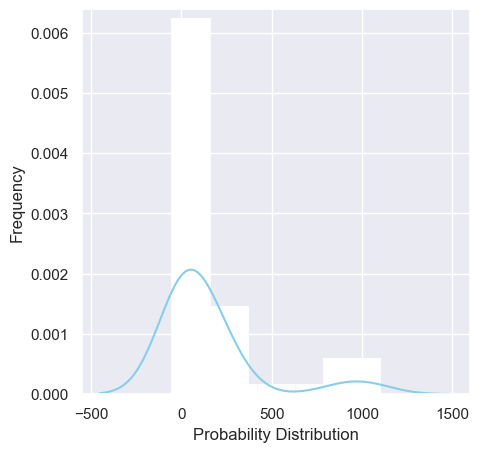

In [196]:
from matplotlib.pyplot import ylabel

# membuat plot dari probability distribution
ax = sns.distplot(df_nyc_pivot_2016, 
                kde=True,
                bins=10,
                color='skyblue',
                hist_kws={"linewidth" : 15, 'alpha' : 1})
ax.set(xlabel='Probability Distribution', ylabel='Frequency')

### Confidence Interval
#### Question : Berapakah rentang harga jual dari BUILDING CLASS CATEGORY 01 ONE FAMILY DWELLINGS?

- Membuat dataframe

In [205]:
# membuat dataframe yang dikelompokkan berdasarkan building class category (menjadi index) dan memiliki atribut mean, std, dan size dari sale price terhadap index tersebut
df_nyc_ci = df_nyc.groupby('BUILDING CLASS CATEGORY').agg({"SALE PRICE" : [np.mean, np.std, np.size]})
df_nyc_ci

SALE PRICE                \
                                                      mean           std   
BUILDING CLASS CATEGORY                                                    
01 ONE FAMILY DWELLINGS                       7.314679e+05  8.900906e+05   
02 TWO FAMILY DWELLINGS                       7.219068e+05  8.072662e+05   
03 THREE FAMILY DWELLINGS                     7.434044e+05  9.054746e+05   
04 TAX CLASS 1 CONDOS                         5.779093e+05  5.987294e+05   
05 TAX CLASS 1 VACANT LAND                    7.341910e+05  9.926686e+05   
06 TAX CLASS 1 - OTHER                        6.920652e+05  6.390183e+05   
07 RENTALS - WALKUP APARTMENTS                1.983105e+06  4.664201e+06   
08 RENTALS - ELEVATOR APARTMENTS              1.317291e+07  3.859852e+07   
09 COOPS - WALKUP APARTMENTS                  5.378727e+05  1.038549e+06   
10 COOPS - ELEVATOR APARTMENTS                8.201230e+05  1.451887e+06   
11 SPECIAL CONDO BILLING LOTS                 9.382280e+05  4.783266e+05   
11A CONDO-RENTALS                             9.353717e+06  2.638361e+07   
12 CONDOS - WALKUP APARTMENTS                 7.072955e+05  5.427619e+05   
13 CONDOS - ELEVATOR APARTMENTS               1.863032e+06  3.285897e+06   
14 RENTALS - 4-10 UNIT                        1.433067e+06  3.402836e+06   
15 CONDOS - 2-10 UNIT RESIDENTIAL             1.275199e+06  1.855998e+06   
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT    2.169728e+06  4.696420e+06   
17 CONDO COOPS                                1.012736e+06  1.362450e+06   
18 TAX CLASS 3 - UNTILITY PROPERTIES          6.382280e+05  7.369622e+05   
21 OFFICE BUILDINGS                           2.540826e+07  1.415107e+08   
22 STORE BUILDINGS                            2.400142e+06  7.033227e+06   
23 LOFT BUILDINGS                             7.302943e+06  1.561553e+07   
25 LUXURY HOTELS                              9.534384e+07  7.753944e+07   
26 OTHER HOTELS                               1.246096e+07  3.138727e+07   
27 FACTORIES                                  4.317339e+06  1.899828e+07   
28 COMMERCIAL CONDOS                          5.560961e+06  1.605934e+07   
29 COMMERCIAL GARAGES                         2.505163e+06  1.518958e+07   
30 WAREHOUSES                                 3.140676e+06  7.543595e+06   
31 COMMERCIAL VACANT LAND                     3.323238e+06  1.377512e+07   
32 HOSPITAL AND HEALTH FACILITIES             6.652701e+06  1.616198e+07   
33 EDUCATIONAL FACILITIES                     2.454384e+06  4.291661e+06   
34 THEATRES                                   9.324745e+06  1.281447e+07   
35 INDOOR PUBLIC AND CULTURAL FACILITIES      4.663262e+06  1.428989e+07   
36 OUTDOOR RECREATIONAL FACILITIES            4.705785e+06  1.239102e+07   
37 RELIGIOUS FACILITIES                       3.206939e+06  9.987631e+06   
38 ASYLUMS AND HOMES                          7.580815e+06  1.736661e+07   
39 TRANSPORTATION FACILITIES                  1.100000e+05  1.555635e+05   
40 SELECTED GOVERNMENTAL FACILITIES           8.000000e+06  1.131371e+07   
41 TAX CLASS 4 - OTHER                        2.682308e+06  1.516527e+07   
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC     8.216528e+06  2.563330e+07   
43 CONDO OFFICE BUILDINGS                     3.147860e+06  1.666095e+07   
44 CONDO PARKING                              5.504459e+05  9.372692e+05   
45 CONDO HOTELS                               1.530912e+06  6.151418e+06   
46 CONDO STORE BUILDINGS                      4.256616e+06  1.067058e+07   
47 CONDO NON-BUSINESS STORAGE                 7.927525e+05  6.134891e+05   
48 CONDO TERRACES/GARDENS/CABANAS             4.800096e+05  6.106137e+05   
49 CONDO WAREHOUSES/FACTORY/INDUS             1.331139e+05  3.877178e+05   

                                                     
                                               size  
BUILDING CLASS CATEGORY                              
01 ONE FAMILY DWELLINGS                       18235  
02 TWO FAMILY DWELLINGS        

- Menentukan Mean, std, dan size dari ONE FAMILY DWELLINGS

In [201]:
# Mean, std, dan size dari ONE FAMILY DWELLINGS	
mean_ofd = 5.892382e+05	
sd_ofd = 9.493621e+05	
n_ofd = 18235
z = 1.96

- Menentukan standar error dari harga jual ONE FAMILY DWELLINGS	

In [202]:
se = sd_ofd / np.sqrt(n_ofd)
se

7030.383341778059

Menentukan lcb dan ucb dari harga jual ONE FAMILY DWELLINGS

In [203]:
lcb = mean_ofd - z*se
ucb = mean_ofd + z*se
lcb, ucb

(575458.648650115, 603017.7513498849)

Analysis : Confidence Interval dari harga jual kategori building ONE FAMILY DWELLINGS adalah 575458.648650115 - 603017.7513498849

### Hypothesis Testing
#### Question : Apakah terdapat ketergantungan antara nilai pada atribut BOROUGH dengan atribut SALE PRICE?

H0 : Tidak terdapat ketergantungan, kedua samples saling lepas  (Independent)

H1 : Terdapat ketergantungan (Dependency) diantara kedua samples 

In [210]:
from scipy.stats import spearmanr

# mengisi nilai NaN pada atribut 'BOROUGH' dan 'SALE PRICE' dengan nilai rata-ratanya 
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].fillna(df_nyc['BOROUGH'].mean())
df_nyc['SALE PRICE'] = df_nyc['SALE PRICE'].fillna(df_nyc['SALE PRICE'].mean())

# membuat list dari value atribut 'BOROUGH' dan 'SALE PRICE'
data1 = df_nyc['BOROUGH'].tolist()
data2 = df_nyc['SALE PRICE'].tolist()

# mencari nilai stat dan p dari data1 dan data2
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' %(stat, p))

# menentukan hasil
if p > 0.05 :
    print('Probably independent')
else : 
    print('Probably dependent')

stat=-0.121, p=0.000
Probably dependent


Analysis : Berdasarkan hasil diatas dapat dianalisis bahwa kedua atribut tersebut bersifat dependent atau terdapat ketergantungan (dependency) diantara kedua atribut tersebut